# Sentiment Analysis
### Credit:
#### [How to Use Word Embedding Layers for Deep Learning with Keras](https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/)
#### [Word embedding using keras embedding layer | Deep Learning Tutorial 40 (Tensorflow, Keras & Python)](https://www.youtube.com/watch?v=Fuw0wv3X-0o&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=41)
### Reference:
#### [What Are Word Embeddings for Text?](https://machinelearningmastery.com/what-are-word-embeddings/)

# [What Is Keras?](https://www.simplilearn.com/tutorials/deep-learning-tutorial/what-is-keras)
Keras is a high-level, open-sourced end-to-end platform supporting, deep learning API developed by **Google** for implementing neural networks. It is written in Python and is used to make the implementation of neural networks easy. It also supports multiple backend neural network computation.                         

**Keras** is relatively easy to learn and work with because it provides a python frontend with a high level of abstraction while having the option of multiple back-ends for computation purposes. This makes <u>*Keras slower than other deep learning frameworks, but extremely beginner-friendly.*</u>


Keras allows you to switch between different back ends frameworks. The frameworks supported by Keras are:<br>
* Tensorflow
* Theano
* PlaidML
* MXNet
* CNTK (Microsoft Cognitive Toolkit )

Out of these five frameworks, **TensorFlow** has adopted **Keras** as its official high-level API. **Keras** is embedded in TensorFlow and can be used to perform deep learning fast as it provides inbuilt modules for all neural network computations. At the same time, computation involving tensors, computation graphs, sessions, etc can be custom made using the Tensorflow Core API, which gives you total flexibility and control over your application and lets you implement your ideas in a relatively short time.

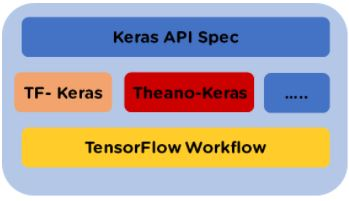

#### Keras Backend

In [1]:
!pip3 install keras
!pip3 install --upgrade keras

In [2]:
import numpy as np

import tensorflow
import keras

from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

print(keras.__version__)

3.3.3


#### Supervised Learning Word Embedding
For food review classification

In [3]:
reviews = ['nice food',
        'amazing restaurant',
        'too good',
        'just loved it!',
        'will go again',
        'horrible food',
        'never go there',
        'poor service',
        'poor quality',
        'needs improvement']

sentiment = np.array([1,1,1,1,1,0,0,0,0,0])

#### Here, **one hot** encoding is used to give unique number to the word text from <br> the given input range of vocabulary having length 30 or 50.

In [4]:
# one hot encoding for two words. Here one hot encoding will assign a unique
# value to two words from the range of vocab_size = 30
vocab_size = 30
one_hot('amazing restaurant', vocab_size)

[20, 15]

In [5]:
one_hot('great restaurant', vocab_size)

[17, 15]

In [6]:
one_hot('good restaurant', vocab_size)

[1, 15]

In [7]:
one_hot('nice restaurant', vocab_size)

[16, 15]

In [8]:
one_hot('awesome restaurant', vocab_size)

[21, 15]

In [9]:
one_hot('fabulous restaurant', vocab_size)

[2, 15]

In [10]:

encode_review = []
for encode_text in reviews:
  encode_review.append(one_hot(encode_text, vocab_size))
print(encode_review)


[[16, 12], [20, 15], [23, 1], [11, 7, 22], [16, 26, 2], [23, 12], [7, 26, 7], [22, 16], [22, 11], [1, 11]]


In [11]:
# list comprehension of above source code
encode_review = [one_hot(encode_text, vocab_size) for encode_text in reviews]
print(encode_review)

[[16, 12], [20, 15], [23, 1], [11, 7, 22], [16, 26, 2], [23, 12], [7, 26, 7], [22, 16], [22, 11], [1, 11]]


#### Each input word has to be vectorized with common and equal dimension for each and every word

In [12]:
max_ip_len = 4

# pad_sequences
It is a built-in function in libraries like **TensorFlow and Keras**, making it easy to use and integrate into your data preprocessing pipeline.

Keras <u>**pad_sequences**</u> function is used to pad the sequences with the same length. The keras pad sequence function transforms several sequences into the numpy array.

```
tf.keras.utils.pad_sequences(
    sequences,
    maxlen=None,
    dtype='int32',
    padding='pre',
    truncating='pre',
    value=0.0
)
```

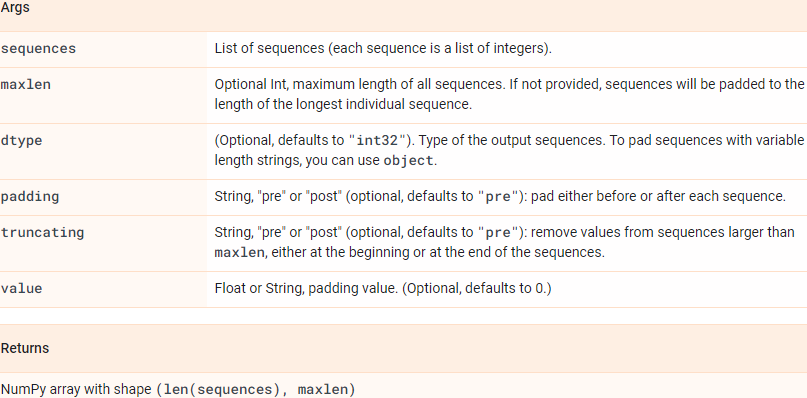

In [13]:
padding_review = pad_sequences(sequences=encode_review, maxlen=max_ip_len, padding='post')
# padding_review = pad_sequences(sequences=encode_review, maxlen=max_ip_len, padding='pre')
padding_review

array([[16, 12,  0,  0],
       [20, 15,  0,  0],
       [23,  1,  0,  0],
       [11,  7, 22,  0],
       [16, 26,  2,  0],
       [23, 12,  0,  0],
       [ 7, 26,  7,  0],
       [22, 16,  0,  0],
       [22, 11,  0,  0],
       [ 1, 11,  0,  0]], dtype=int32)

In [14]:
# length of densed embedding vector. It can vary 32, 50 and 100
embed_vector_size = 8

# [Embedding class layer](https://keras.io/api/layers/core_layers/embedding/)


```
keras.layers.Embedding(
    input_dim,
    output_dim,
    embeddings_initializer="uniform",
    embeddings_regularizer=None,
    embeddings_constraint=None,
    mask_zero=False,
    weights=None,
    lora_rank=None,
    **kwargs
)
```



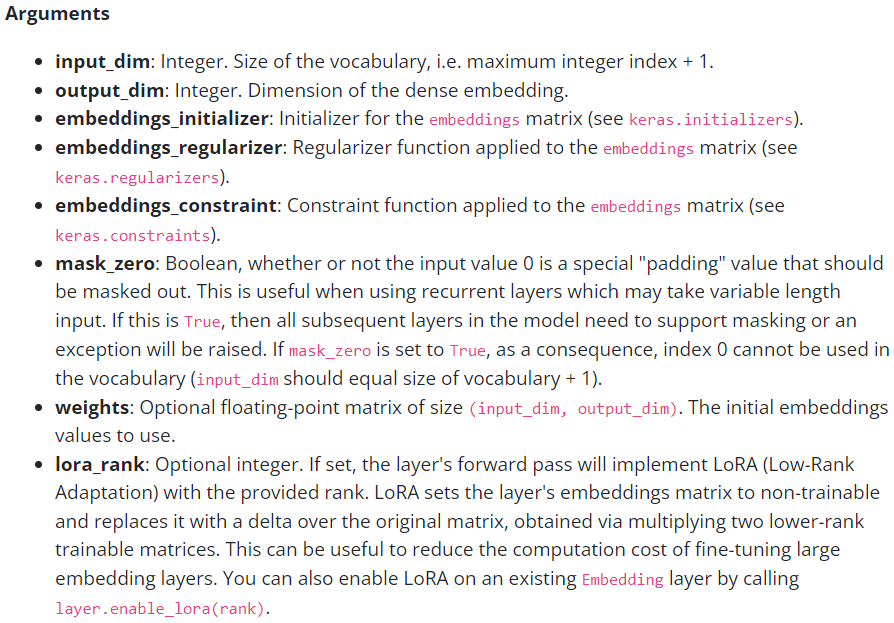

## Input shape
2D tensor with shape: (batch_size, input_length).

## Output shape
3D tensor with shape: (batch_size, input_length, output_dim).

Embedding layer is the first neural network layer in the model

The Embedding layer in neural networks is primarily used for representing categorical variables or discrete entities, like words in natural language processing (NLP) tasks or categorical features in machine learning models. Its main purpose is to learn a dense, low-dimensional representation of these categorical variables in a continuous vector space.

Here are some key uses and benefits of the Embedding layer:

1. Word Embeddings in NLP: In natural language processing, words are often represented as one-hot encoded vectors, which can be sparse and high-dimensional, especially for large vocabularies. Embedding layers allow the model to learn dense representations of words, capturing semantic relationships and contextual information. These learned word embeddings can improve model performance in tasks such as sentiment analysis, machine translation, and text generation.

2. Categorical Feature Representation: In machine learning tasks where categorical features are present, such as user IDs, product categories, or geographic locations, using one-hot encoding can lead to high-dimensional feature spaces and difficulties in learning. Embedding layers provide a more efficient and effective way to represent these categorical variables by mapping them to continuous, lower-dimensional vectors while preserving important relationships between categories.

3. Dimensionality Reduction: Embedding layers help reduce the dimensionality of categorical variables, making them more manageable and easier for the model to process. By learning a dense representation, the model can capture meaningful patterns and relationships in the data more effectively.

4. Transfer Learning: Pre-trained embeddings, such as word embeddings trained on large text corpora (e.g., Word2Vec, GloVe, FastText), can be used as initializations for embedding layers in specific tasks. This transfer of knowledge from pre-trained embeddings can help bootstrap model training, especially when labeled data is limited.

Overall, the Embedding layer plays a crucial role in representing categorical variables in neural networks, facilitating effective learning and generalization in various tasks, especially in NLP and machine learning applications involving categorical data.

In [15]:
model = Sequential()
# 'vocab_size' is the size of entire text corpus.
# 'embed_vector_size' is the size of dense embedding vector for each word
model.add(Embedding(vocab_size, embed_vector_size))

## [Flatten class layer](https://keras.io/api/layers/reshaping_layers/flatten/)
It is the second / hidden neural network layer into the model.

In neural networks, a Flatten layer is used to convert multi-dimensional data into a one-dimensional array. This is often necessary when transitioning from convolutional layers, which work with multi-dimensional data like images, to fully connected layers, which require one-dimensional input.

In summary, the Flatten layer is used to reshape the data in a format suitable for further processing by fully connected layers, enabling the neural network to make predictions or perform other tasks based on the extracted features.

In [16]:
model.add(Flatten())

## [Dense class layer](https://keras.io/api/layers/core_layers/dense/)
```
keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    lora_rank=None,
    **kwargs
)
```



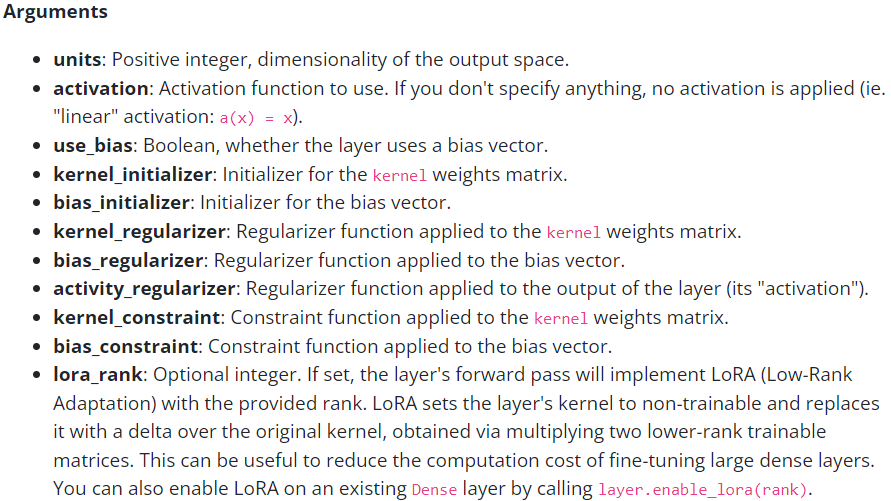

## Input shape
N-D tensor with shape: (batch_size, ..., input_dim). The most common situation would be a 2D input with shape (batch_size, input_dim).

## Output shape
N-D tensor with shape: (batch_size, ..., units). For instance, for a 2D input with shape (batch_size, input_dim), the output would have shape (batch_size, units).

Last layer is the one neuron sigmoid activation function layer in the model

In [17]:
model.add(Dense(1, activation='sigmoid'))

In [18]:
X = np.array(padding_review) # training samples
y = np.array(sentiment)      # testing samples

# [Compile Method](https://keras.io/api/models/model_training_apis/)

```
Model.compile(
    optimizer="rmsprop",
    loss=None,
    loss_weights=None,
    metrics=None,
    weighted_metrics=None,
    run_eagerly=False,
    steps_per_execution=1,
    jit_compile="auto",
    auto_scale_loss=True,
)
```

The model.compile() function in frameworks like TensorFlow and Keras is used to configure the learning process before training a neural network model. It takes several arguments that define how the model will be trained, including the optimizer, loss function, and optional metrics. Here's a breakdown of its primary uses:

1. Optimizer Selection: The optimizer argument specifies the optimization algorithm to be used during training. Common choices include stochastic gradient descent (SGD), Adam, RMSprop, and others. Each optimizer has its own parameters and learning behavior, which can influence the training process and model performance.

2. Loss Function Specification: The loss argument specifies the loss function to be optimized during training. The loss function measures how well the model's predictions match the true labels or targets. The choice of loss function depends on the type of problem being solved (e.g., classification, regression) and the desired properties of the model's output.

3. Metrics Definition: The metrics argument allows you to specify additional evaluation metrics to be computed during training and validation. These metrics provide additional insights into the model's performance beyond the loss function. Common metrics include accuracy, precision, recall, F1 score, and others. These metrics are useful for monitoring the model's performance during training and evaluating its effectiveness on unseen data.

4. Once the model.compile() function is called with the appropriate arguments, the model is configured for training, and subsequent calls to model.fit() will use the specified optimizer, loss function, and metrics to train the model on the provided training data.

In summary, model.compile() is a crucial step in configuring the learning process of a neural network model, allowing you to specify the optimizer, loss function, and evaluation metrics tailored to your specific problem and requirements.

In [19]:
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['aacuracy'])
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[
        keras.metrics.BinaryAccuracy(),
        keras.metrics.FalseNegatives(),
    ],
)

Train the model

In [20]:
# Trains the model for a fixed number of epochs (dataset iterations).
model.fit(X, y, epochs=50, verbose=0)
# model.fit(X, y, epochs=50, verbose=1)
# model.fit(X, y, epochs=50, verbose=2)

In [21]:
# Returns the loss value & metrics values for the model in test mode.
# Computation is done in batches (see the batch_size arg.)
model.evaluate(X, y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - binary_accuracy: 0.9000 - false_negatives: 0.0000e+00 - loss: 0.6322


[0.6321889162063599, 0.8999999761581421, 0.0]

# [summary method](https://keras.io/api/models/model/#summary-method)

In [22]:
print(model.summary())
# Embedding : padding_review = number of max words in a sentence = 4
#           : embed_vector_size = dense embedding vector length for each word = 5
# Flatten   : padding_review x embed_vector_size = 4 x 8 = 32
# Dense     : 1 neuron activation function = Sigmoid

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 4, 8)                │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 821 (3.21 KB)

 Trainable params: 273 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 548 (2.14 KB)

None


In [23]:
model.metrics_names
# print(model.metrics_names)

['loss', 'compile_metrics']

In [24]:
# loss, accuracy = model.evaluate(padding_review, sentiment, verbose=0)
scores = model.evaluate(X, y)
print("loss            : ", scores[0])
print("binary_accuracy : ", scores[1])
print("false_negatives : ", scores[2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - binary_accuracy: 0.9000 - false_negatives: 0.0000e+00 - loss: 0.6322
loss            :  0.6321889162063599
binary_accuracy :  0.8999999761581421
false_negatives :  0.0


In [25]:
# vocab_size = 30,
print("Length of weights for Embedded layer is vocab_size : ", len(model.get_layer('embedding').get_weights()[0]))
print("All weights of Embedded layer is : \n", model.get_layer('embedding').get_weights()[0])

print("Length of weights for Flatten layer : ", len(model.get_layer('flatten').get_weights()))
print(model.get_layer('flatten').get_weights())

print("Length of weights for Dense layer : ", len(model.get_layer('dense').get_weights()[0]))
print(model.get_layer('dense').get_weights()[0])
weights = model.get_layer('embedding').get_weights()[0]

Length of weights for Embedded layer is vocab_size :  30
All weights of Embedded layer is : 
 [[-4.05842662e-02 -8.84250924e-03 -6.14498816e-02 -4.63697873e-02
  -1.87284369e-02  1.86207630e-02  5.78910373e-02  9.88589786e-03]
 [-8.54607299e-03  2.69339588e-02  6.47883713e-02  2.90541071e-02
   4.08972539e-02  4.01701517e-02  1.12570405e-01  3.39699648e-02]
 [ 2.42972393e-02  9.82966572e-02  4.27693501e-02  8.17609057e-02
   1.50989939e-03 -6.37070164e-02 -3.22912373e-02  1.03505544e-01]
 [-7.54046440e-03  1.52703859e-02  2.26555951e-02 -2.34687459e-02
  -2.95448434e-02 -4.32365015e-03 -1.16315484e-02 -1.11095905e-02]
 [ 1.28507614e-03 -4.89157438e-03 -4.13620584e-02 -3.96642461e-02
  -5.19002602e-03 -4.50274721e-02 -6.25879690e-03 -1.08026341e-03]
 [ 2.94100903e-02 -8.42631981e-03  3.52837928e-02 -4.49729562e-02
  -9.44034010e-03 -7.22259283e-03  5.19455597e-03 -1.47461891e-03]
 [ 4.95508946e-02  1.89986713e-02  2.80428268e-02  4.58691008e-02
  -2.11712122e-02  4.74974029e-02 -4.22323

#### Check the weight of "encode_review" means few of word text like
Note, these encode_review values change with every run

'nice food', 'amazing restaurant', 'too good',
[16, 12], [20, 15], [23, 1]

here 'nice' = 16, 'amazing' = 20 and 'good' = 1


In [30]:
weights[16]

array([ 0.01741257, -0.08036567, -0.05605384, -0.09657373, -0.09277666,
       -0.03270761, -0.0819911 , -0.05289082], dtype=float32)

In [31]:
weights[20]

array([ 0.08111574, -0.0843336 , -0.00026376, -0.06277379, -0.03433828,
       -0.0160823 , -0.0216677 , -0.0723253 ], dtype=float32)

In [32]:
weights[1]

array([-0.00854607,  0.02693396,  0.06478837,  0.02905411,  0.04089725,
        0.04017015,  0.11257041,  0.03396996], dtype=float32)

In [29]:
weights

array([[-4.05842662e-02, -8.84250924e-03, -6.14498816e-02,
        -4.63697873e-02, -1.87284369e-02,  1.86207630e-02,
         5.78910373e-02,  9.88589786e-03],
       [-8.54607299e-03,  2.69339588e-02,  6.47883713e-02,
         2.90541071e-02,  4.08972539e-02,  4.01701517e-02,
         1.12570405e-01,  3.39699648e-02],
       [ 2.42972393e-02,  9.82966572e-02,  4.27693501e-02,
         8.17609057e-02,  1.50989939e-03, -6.37070164e-02,
        -3.22912373e-02,  1.03505544e-01],
       [-7.54046440e-03,  1.52703859e-02,  2.26555951e-02,
        -2.34687459e-02, -2.95448434e-02, -4.32365015e-03,
        -1.16315484e-02, -1.11095905e-02],
       [ 1.28507614e-03, -4.89157438e-03, -4.13620584e-02,
        -3.96642461e-02, -5.19002602e-03, -4.50274721e-02,
        -6.25879690e-03, -1.08026341e-03],
       [ 2.94100903e-02, -8.42631981e-03,  3.52837928e-02,
        -4.49729562e-02, -9.44034010e-03, -7.22259283e-03,
         5.19455597e-03, -1.47461891e-03],
       [ 4.95508946e-02,  1.899867